Starting test...


c:\Python313\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_54 (Conv2D)              │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_55 (Conv2D)              │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_56 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_18 (Flatten)            │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 128)            │     2,359,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,453,188 (9.36 MB)

 Trainable params: 2,453,188 (9.36 MB)

 Non-trainable params: 0 (0.00 B)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [9.837319e-05..1.9356326].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.00019993045..1.9423496].


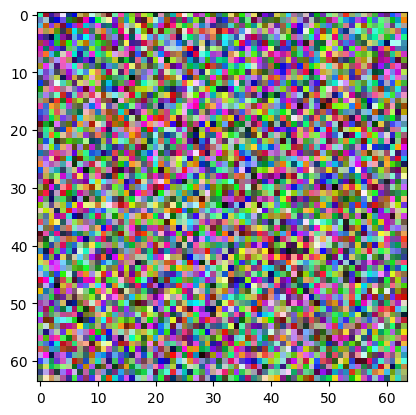

Epoch 1/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.5000 - loss: 1.3423
Epoch 2/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5900 - loss: 0.8055
Epoch 3/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7800 - loss: 0.5022
Epoch 4/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8000 - loss: 0.4200
Epoch 5/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7800 - loss: 0.3765
4/4 - 0s - 48ms/step - accuracy: 0.8000 - loss: 0.2978

Test accuracy: 0.800000011920929


In [21]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

def build_model(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=input_shape))
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

def test():
    # Example input shape and number of classes
    input_shape = (64, 64, 3)  # 64x64 RGB images
    num_classes = 4           # 10 classes for classification
    train_szie = 100

    # Build the model
    model = build_model(input_shape, num_classes)
    
    # Print the model summary
    model.summary()
    
    # Generate some random data for demonstration
    x_train = np.random.rand(train_szie, *input_shape).astype(np.float32)
    y_train = np.random.randint(0, num_classes, size=(train_szie,)).astype(np.int32)
    

    shapes = basic_shape(input_shape[:2])
    feature_shapes = np.zeros((train_szie,) + input_shape[:2])
    for i in range(train_szie):
        feature_shapes[i] = shapes[y_train[i]]
    
    
    # adding class features
    rdm = np.concatenate([np.diag(np.random.rand(train_szie)*0.4+0.6)[None,:,:] for _ in range(3)])
    feature = np.tensordot(rdm, feature_shapes, ((2,0))).transpose(1,2,3,0)
    # np.apply_along_axis(randroll, 1, np.apply_along_axis(randroll, 2, feature))
    x_train += feature
    
    plt.imshow(x_train[12])
    plt.imshow(x_train[13])
    plt.imshow(x_train[14])
    plt.show()

    # Train the model
    model.fit(x_train, y_train, epochs=5, batch_size=16)
    
    
    # Evaluate the model
    test_loss, test_acc = model.evaluate(x_train, y_train, verbose=2)
    print('\nTest accuracy:', test_acc)
    
    
    

    






def basic_shape(input_shape, type = None):
    if type is None:
        return [basic_shape(input_shape, 'circle'),
                basic_shape(input_shape, 'square'),
                basic_shape(input_shape, 'circle-border'),
                basic_shape(input_shape, 'square-border')]
    
    xi_x = np.arange(input_shape[0])[:, None]; xi_y = np.arange(input_shape[1])[None, :]
    center = (input_shape[0] / 2, input_shape[1] / 2)
    
    if type == 'circle':
        rsqr = (xi_x - center[0])**2 + (xi_y - center[1])**2
        rsqr = rsqr / rsqr.max() / 2  # Normalize to [0, 1]
        rsqr[rsqr <= 0.64] = 1.0
        rsqr[rsqr > 0.64] = 0.0
        return rsqr
    
    elif type == 'square':
        square = np.zeros(input_shape)
        square[input_shape[0]//4:3*input_shape[0]//4,
               input_shape[1]//4:3*input_shape[1]//4] = 1.0
        return square
    
    elif type == 'circle-border':
        rsqr = (xi_x - center[0])**2 + (xi_y - center[1])**2
        rsqr = rsqr / rsqr.max() /2  # Normalize to [0, 1]
        border = np.zeros(input_shape)
        border[(rsqr > 0.49) & (rsqr <= 0.64)] = 1.0
        return border
    
    elif type == 'square-border':
        border = np.zeros(input_shape)
        border[input_shape[0]//4:3*input_shape[0]//4,
               input_shape[1]//4:3*input_shape[1]//4] = 1.0
        border[input_shape[0]//4+4:3*input_shape[0]//4-4,
               input_shape[1]//4+4:3*input_shape[1]//4-4] = 0.0
        return border
        
def translation(input_array, shift_x, shift_y):
    return np.roll(np.roll(input_array, shift_y, axis=0), shift_x, axis=1)

def randroll(input_array, max_shift = 20):
    return np.roll(input_array, np.random.randint(-max_shift, max_shift), axis=0)


def main():
    print("Starting test...")
    test()

main()
